In [1]:
import pandas as pd
import altair as alt
import matplotlib.pyplot as plt
import seaborn as sns
import glob
import geopandas as gpd

In [2]:
sns.set_theme(style="darkgrid")

In [3]:
df1=pd.read_csv("access_1800_1.csv").drop(columns=['POP10','acc1800','acc1800_1000'])
df1.columns=['geoid','acc1800_n_1']
df2=pd.read_csv("access_1800_max_f.csv").drop(columns=['POP10','acc1800','acc1800_1000'])
df2.columns=['geoid','acc1800_max_f']
df3=pd.read_csv("access_1800_min_f.csv").drop(columns=['POP10','acc1800','acc1800_1000'])
df3.columns=['geoid','acc1800_min_f']
df4=pd.read_csv("access_1800_min_a.csv").drop(columns=['POP10','acc1800','acc1800_1000'])
df4.columns=['geoid','acc1800_min_a']

df=df1.merge(df2,on="geoid")
df=df.merge(df3,on='geoid')
df=df.merge(df4,on='geoid')
df.head()

,geoid,acc1800_n_1,acc1800_max_f,acc1800_min_f,acc1800_min_a
0,170318046091014,0.576805,0.577585,0.575744,0.301164
1,170318234004046,0.505850,0.506456,0.505109,0.509630
2,170318226022022,0.567752,0.568316,0.566983,0.603336
3,170318232002032,0.527867,0.528555,0.527309,0.501024
4,170318233023013,0.517321,0.517947,0.516641,0.525972


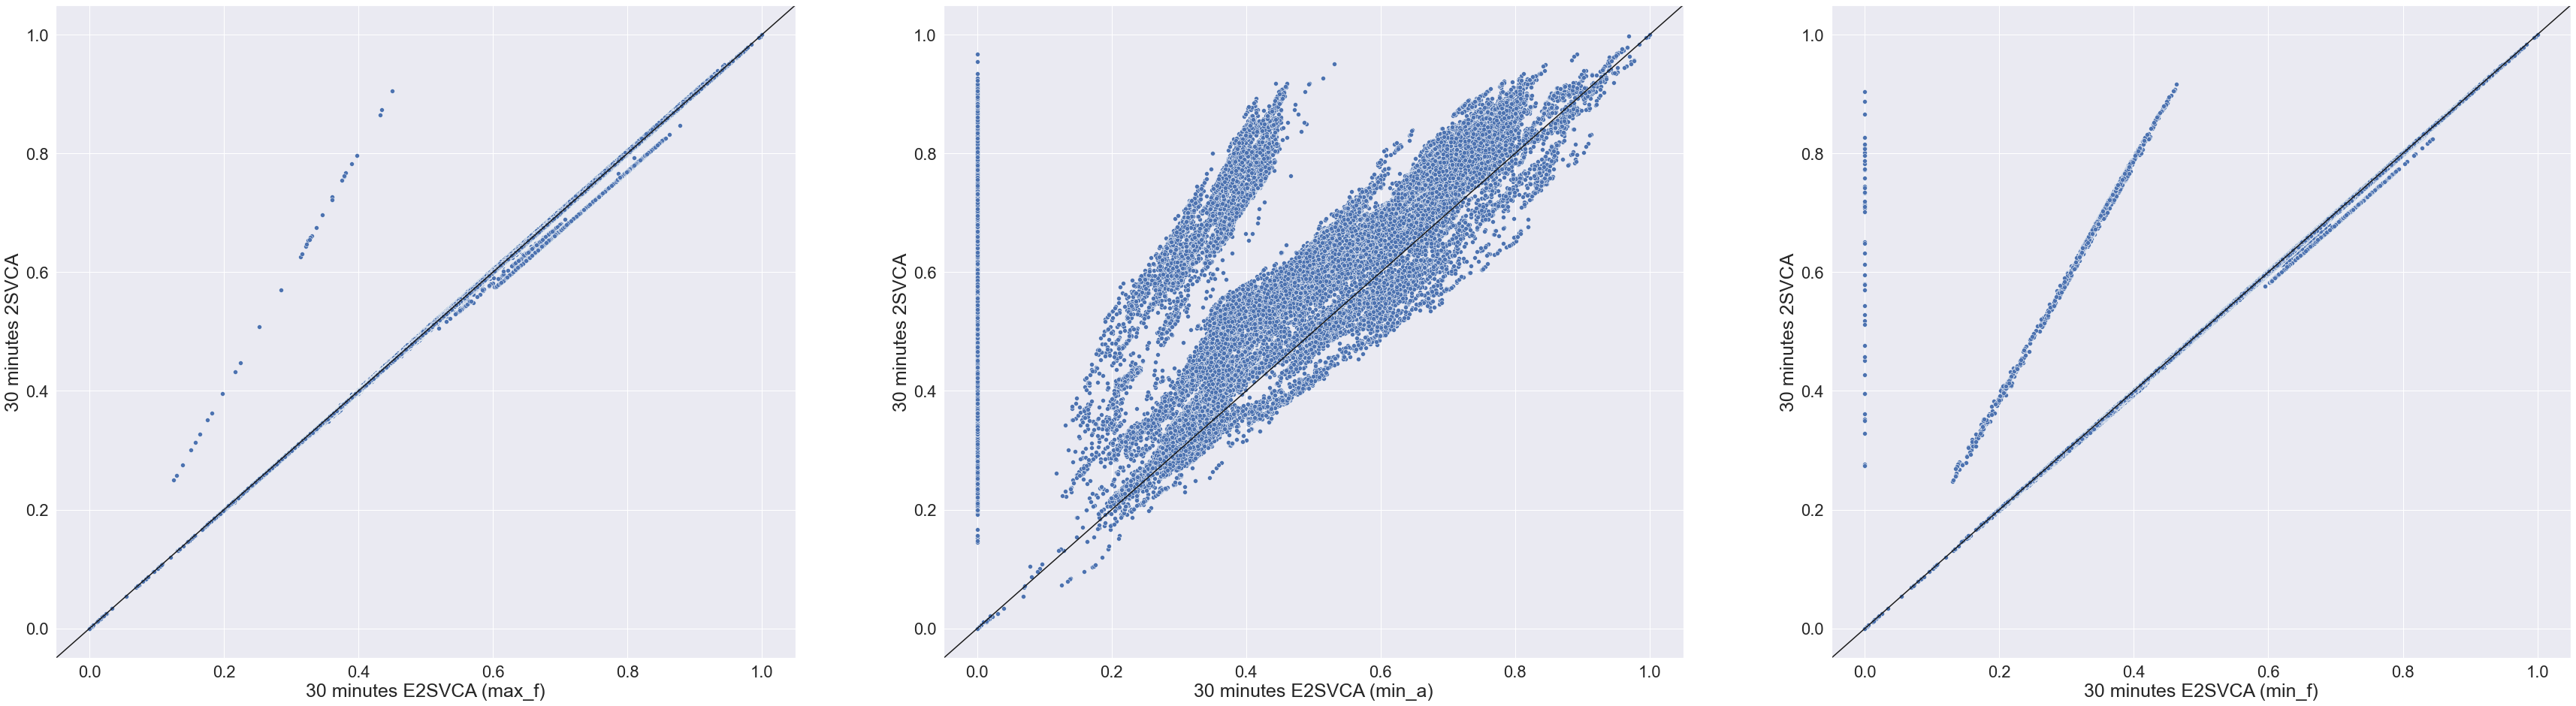

In [4]:
sns.set(font_scale = 2)
#fig, (ax1,ax2,ax3) = plt.subplots(nrows=1, ncols=3, figsize=(30, 8))
fig, (ax1,ax2,ax3) = plt.subplots(nrows=1, ncols=3, figsize=(60, 16))
#ax1 = indivi_df.plot.scatter(x='e2sfcag15_',y='e2sfcag1_1',c='DarkBlue')
# sns.scatterplot(x=df2["e2sg15_att"], y=df2['e2sg15_doc'], ax=ax1)
# sns.scatterplot(x=df2["e2sg30_att"], y=df2['e2sg30_doc'], ax=ax2)
# sns.scatterplot(x=df2["e2sg45_att"], y=df2['e2sg45_doc'], ax=ax3)
# sns.scatterplot(x=df2["e2sg60_att"], y=df2['e2sg60_doc'], ax=ax4)

# sns.scatterplot(x=df["acc1800_n_1"], y=df['acc1800_min_a'], ax=ax1)
# sns.scatterplot(x=df["acc1800_n_1"], y=df['acc1800_max_f'], ax=ax2)
# sns.scatterplot(x=df["acc1800_n_1"], y=df['acc1800_min_f'], ax=ax3)

sns.scatterplot(x=df["acc1800_max_f"], y=df['acc1800_n_1'], ax=ax1, palette='Paired')
sns.scatterplot(x=df["acc1800_min_a"], y=df['acc1800_n_1'], ax=ax2, palette='Paired')
sns.scatterplot(x=df["acc1800_min_f"], y=df['acc1800_n_1'], ax=ax3, palette='Blues')


ax1.plot([0,1],[0,1], transform=ax1.transAxes, color='k')
ax2.plot([0,1],[0,1], transform=ax2.transAxes, color='k')
ax3.plot([0,1],[0,1], transform=ax3.transAxes, color='k')

# ax1.set_xlim(0,0.018)
# ax1.set_ylim(0,0.018)
# ax2.set_xlim(0,0.008)
# ax2.set_ylim(0,0.008)
# ax3.set_xlim(0,0.0065)
# ax3.set_ylim(0,0.0065)
# ax4.set_xlim(0,0.0065)
# ax4.set_ylim(0,0.0065)
# ax1.set_xlabel('30 minutes 2SVCA')
# ax1.set_ylabel('30 minutes E2SVCA (min_a)')
# ax2.set_xlabel('30 minutes 2SVCA')
# ax2.set_ylabel('30 minutes E2SVCA (max_f)')
# ax3.set_xlabel('30 minutes 2SVCA')
# ax3.set_ylabel('30 minutes E2SVCA (min_f)')



ax1.set_ylabel('30 minutes 2SVCA',fontsize=25)
ax1.set_xlabel('30 minutes E2SVCA (max_f)',fontsize=25)
ax2.set_ylabel('30 minutes 2SVCA',fontsize=25)
ax2.set_xlabel('30 minutes E2SVCA (min_a)',fontsize=25)
ax3.set_ylabel('30 minutes 2SVCA',fontsize=25)
ax3.set_xlabel('30 minutes E2SVCA (min_f)',fontsize=25)

fig.savefig("30_minutes_2SVCA_VS_E2SVCA",dpi=300)

In [5]:
df['diff_max_f'] =df['acc1800_n_1']-df['acc1800_max_f']
df['diff_min_a'] =df['acc1800_n_1']-df['acc1800_min_a']
df['diff_min_f'] =df['acc1800_n_1']-df['acc1800_min_f']
df.head()

,geoid,acc1800_n_1,acc1800_max_f,acc1800_min_f,acc1800_min_a,diff_max_f,diff_min_a,diff_min_f
0,170318046091014,0.576805,0.577585,0.575744,0.301164,-0.000780,0.275641,0.001060
1,170318234004046,0.505850,0.506456,0.505109,0.509630,-0.000605,-0.003780,0.000742
2,170318226022022,0.567752,0.568316,0.566983,0.603336,-0.000564,-0.035583,0.000769
3,170318232002032,0.527867,0.528555,0.527309,0.501024,-0.000688,0.026844,0.000558
4,170318233023013,0.517321,0.517947,0.516641,0.525972,-0.000626,-0.008651,0.000680


## acc1800_max_f

In [6]:
diff_max_f=(df.acc1800_n_1 - df.acc1800_max_f).to_frame()
diff_max_f.columns=['diff_max_f']
diff_max_f.head()

,diff_max_f
0,-0.000780
1,-0.000605
2,-0.000564
3,-0.000688
4,-0.000626


In [7]:
diff_max_f_1=diff_max_f[(diff_max_f['diff_max_f']==0) ]
diff_max_f_1.shape

(27, 1)

In [8]:
diff_max_f.shape

(99032, 1)

In [9]:
diff_max_f_1=diff_max_f[(diff_max_f['diff_max_f']>=-0.005) & (diff_max_f['diff_max_f']<=0.005)]
diff_max_f_1.shape

(90432, 1)

In [10]:
diff_max_f_1=diff_max_f[(diff_max_f['diff_max_f']<-0.005) ]#below
diff_max_f_1.shape

(5087, 1)

In [11]:
diff_max_f_1=diff_max_f[(diff_max_f['diff_max_f']>0.005)]# above
diff_max_f_1.shape

(3513, 1)

In [12]:
# make a table
# diff map
#poor area , 

## acc1800_min_a

In [13]:
diff_min_a=(df.acc1800_n_1 - df.acc1800_min_a).to_frame()
diff_min_a.columns=['diff_min_a']
diff_min_a.head()

,diff_min_a
0,0.275641
1,-0.003780
2,-0.035583
3,0.026844
4,-0.008651


In [14]:
diff_min_a_1=diff_min_a[(diff_min_a['diff_min_a']>=-0.005) & (diff_min_a['diff_min_a']<=0.005)]
diff_min_a_1.shape

(1928, 1)

In [15]:
diff_min_a_1=diff_min_a[(diff_min_a['diff_min_a']<-0.005) ]#below
diff_min_a_1.shape

(6494, 1)

In [16]:
diff_min_a_1=diff_min_a[ (diff_min_a['diff_min_a']>0.005)]#above
diff_min_a_1.shape

(90610, 1)

## acc1800_min_f

In [17]:
diff_df=(df.acc1800_n_1 - df.acc1800_min_f).to_frame()
diff_df.columns=['diff_min_f']
diff_min_f.head()

,diff_min_f
0,0.001060
1,0.000742
2,0.000769
3,0.000558
4,0.000680


In [18]:
diff_min_f_1=diff_min_f[(diff_min_f['diff_min_f']==0)]
diff_min_f_1.shape

(27, 1)

In [19]:
diff_df_1=diff_df[(diff_df['diff_df']>=-0.005) & (diff_df['diff_df']<=0.005)]
diff_df_1.shape

(96476, 1)

In [20]:
diff_min_f_1=diff_min_f[(diff_min_f['diff_min_f']<-0.005) ]#below
diff_min_f_1.shape

(1517, 1)

In [21]:
diff_min_f_1=diff_min_f[ (diff_min_f['diff_min_f']>0.005)]# above
diff_min_f_1.shape

(1039, 1)

## map

In [22]:
gdf= gpd.read_file("/Users/yaxiongshao/Documents/GitHub/E2SVCA_15MI_BLOCKS/1.Supply/data/Census2010/CookCountyBlocks/Blocks.shp").drop(columns=['TRACTCE10','HOUSING10'])
gdf['GEOID10'] = gdf['GEOID10'].astype('int64')
gdf.head()

,GEOID10,POP10,LAT,LON,geometry
0,170318046091014,88,42.035398,-88.047327,"POLYGON ((-88.04667 42.03609, -88.04655 42.036..."
1,170318234004046,4,41.663501,-87.707536,"POLYGON ((-87.70602 41.66378, -87.70557 41.663..."
2,170318226022022,69,41.699074,-87.745527,"POLYGON ((-87.74494 41.69999, -87.74494 41.699..."
3,170318232002032,2,41.662969,-87.742686,"POLYGON ((-87.73946 41.66173, -87.73964 41.661..."
4,170318233023013,0,41.661378,-87.711877,"POLYGON ((-87.71278 41.65982, -87.71278 41.659..."


In [23]:
gdf.dtypes

GEOID10        int64
POP10          int64
LAT          float64
LON          float64
geometry    geometry
dtype: object

In [24]:
gdf2=gdf.merge(df,left_on='GEOID10',right_on='geoid')
gdf2.head()

,GEOID10,POP10,LAT,LON,geometry,geoid,acc1800_n_1,acc1800_max_f,acc1800_min_f,acc1800_min_a,diff_max_f,diff_min_a,diff_min_f
0,170318046091014,88,42.035398,-88.047327,"POLYGON ((-88.04667 42.03609, -88.04655 42.036...",170318046091014,0.576805,0.577585,0.575744,0.301164,-0.000780,0.275641,0.001060
1,170318234004046,4,41.663501,-87.707536,"POLYGON ((-87.70602 41.66378, -87.70557 41.663...",170318234004046,0.505850,0.506456,0.505109,0.509630,-0.000605,-0.003780,0.000742
2,170318226022022,69,41.699074,-87.745527,"POLYGON ((-87.74494 41.69999, -87.74494 41.699...",170318226022022,0.567752,0.568316,0.566983,0.603336,-0.000564,-0.035583,0.000769
3,170318232002032,2,41.662969,-87.742686,"POLYGON ((-87.73946 41.66173, -87.73964 41.661...",170318232002032,0.527867,0.528555,0.527309,0.501024,-0.000688,0.026844,0.000558
4,170318233023013,0,41.661378,-87.711877,"POLYGON ((-87.71278 41.65982, -87.71278 41.659...",170318233023013,0.517321,0.517947,0.516641,0.525972,-0.000626,-0.008651,0.000680


In [25]:
gdf2.to_file('E2SVCA_Normalized_Diff.gpkg', driver='GPKG', layer='diff_max_f') 
gdf2.to_file('E2SVCA_Normalized_Diff.gpkg', driver='GPKG', layer='diff_min_a') 
gdf2.to_file('E2SVCA_Normalized_Diff.gpkg', driver='GPKG', layer='diff_min_f') 

/Users/yaxiongshao/opt/miniconda3/lib/python3.10/site-packages/geopandas/io/file.py:362: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  pd.Int64Index,
/Users/yaxiongshao/opt/miniconda3/lib/python3.10/site-packages/geopandas/io/file.py:362: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  pd.Int64Index,
/Users/yaxiongshao/opt/miniconda3/lib/python3.10/site-packages/geopandas/io/file.py:362: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  pd.Int64Index,


## Change margin to 0.0001

### acc1800_max_f

In [50]:
margin=0.000
column='diff_max_f'
diff_df=(df.acc1800_n_1 - df.acc1800_max_f).to_frame()
diff_df.columns=[column]
diff_df.head()

,diff_max_f
0,-0.000780
1,-0.000605
2,-0.000564
3,-0.000688
4,-0.000626


(36881, 1) (27, 1) (62124, 1)


In [51]:
diff_df_on=diff_df[(diff_df[column]>=(-1*margin)) & (diff_df[column]<=margin)]
diff_df_below=diff_df[(diff_df[column]<(-1*margin)) ]#below
diff_df_above=diff_df[ (diff_df[column]>margin)]# above
print(diff_df_below.shape[0],diff_df_on.shape[0],diff_df_above.shape[0])

36881 27 62124


### acc1800_min_a

In [52]:
column='diff_min_a'
diff_df=(df.acc1800_n_1 - df.acc1800_min_a).to_frame()
diff_df.columns=[column]
diff_df.head()

,diff_min_a
0,0.275641
1,-0.003780
2,-0.035583
3,0.026844
4,-0.008651


In [53]:
diff_df_on=diff_df[(diff_df[column]>=(-1*margin)) & (diff_df[column]<=margin)]
diff_df_below=diff_df[(diff_df[column]<(-1*margin)) ]#below
diff_df_above=diff_df[ (diff_df[column]>margin)]# above
print(diff_df_below.shape[0],diff_df_on.shape[0],diff_df_above.shape[0])

7390 27 91615


### acc1800_min_f

In [54]:
column='diff_min_f'
diff_df=(df.acc1800_n_1 - df.acc1800_min_f).to_frame()
diff_df.columns=[column]
diff_df.head()

,diff_min_f
0,0.001060
1,0.000742
2,0.000769
3,0.000558
4,0.000680


In [55]:
diff_df_on=diff_df[(diff_df[column]>=(-1*margin)) & (diff_df[column]<=margin)]
diff_df_below=diff_df[(diff_df[column]<(-1*margin)) ]#below
diff_df_above=diff_df[ (diff_df[column]>margin)]# above
print(diff_df_below.shape[0],diff_df_on.shape[0],diff_df_above.shape[0])

33202 27 65803
